#**Importing Libraries and Reading the Dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import (
    cross_validate, StratifiedKFold
)
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
hd=pd.read_csv('/content/heart_preinc_scal.csv')
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# **Data Inspection**

In [ ]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       298 non-null    int64  
 1   sex       298 non-null    int64  
 2   cp        298 non-null    int64  
 3   trestbps  298 non-null    int64  
 4   chol      298 non-null    int64  
 5   fbs       298 non-null    int64  
 6   restecg   298 non-null    int64  
 7   thalach   298 non-null    int64  
 8   exang     298 non-null    int64  
 9   oldpeak   298 non-null    float64
 10  slope     298 non-null    int64  
 11  ca        298 non-null    int64  
 12  thal      298 non-null    int64  
 13  target    298 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.7 KB


In [ ]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,54.315436,0.687919,0.963087,131.506711,245.238255,0.147651,0.530201,149.654362,0.328859,1.009396,1.406040,0.714765,2.322148,0.543624
std,9.047266,0.464122,1.032460,17.564167,47.431612,0.355350,0.526177,22.934646,0.470589,1.097861,0.608218,1.002950,0.583366,0.498931
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.250000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.750000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,202.000000,1.000000,4.400000,2.000000,4.000000,3.000000,1.000000


# **Splitting Data**

In [ ]:
X = hd.drop("target", axis=1)
y = hd["target"]
print("Shape of X:", X.shape)
print("\nShape of y:", y.shape)

Shape of X: (298, 13)

Shape of y: (298,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [ ]:
num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X_train.select_dtypes(include=["object", "category"]).columns

In [ ]:
# encoder = OneHotEncoder(handle_unknown="ignore")
# X_train_cat = encoder.fit_transform(X_train[cat_cols])
# X_test_cat = encoder.transform(X_test[cat_cols])

# scaler = StandardScaler()
# X_train_num = scaler.fit_transform(X_train[num_cols])
# X_test_num = scaler.transform(X_test[num_cols])

# X_train_final = np.hstack([X_train_num, X_train_cat.toarray()])  # OneHotEncoder output is sparse by default
# X_test_final = np.hstack([X_test_num, X_test_cat.toarray()])

# X_num = scaler.fit_transform(X[num_cols])
# X_cat = encoder.fit_transform(X[cat_cols]).toarray()
# X_final = np.hstack([X_num, X_cat])

# print("Train shape:", X_train_final.shape)
# print("Test shape:", X_test_final.shape)

# print("Means:", np.mean(X_train_num, axis=0))
# print("Stds :", np.std(X_train_num, axis=0, ddof=0))

**PipeLine**

In [ ]:
num_pipeline = Pipeline([
    ("scaler", StandardScaler())
    #,("poly", PolynomialFeatures(degree=2, include_bias=False))  # add degree-2 features
])

# full preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipeline, num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

# transform train/test
X_train_final = preprocessor.fit_transform(X_train)
X_test_final  = preprocessor.transform(X_test)

print("Train final shape:", X_train_final.shape)
print("Test final shape:", X_test_final.shape)


Train final shape: (238, 13)
Test final shape: (60, 13)


In [ ]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
295,52,1,0,128,255,0,1,161,1,0.0,2,1,3
23,42,0,2,120,209,0,1,173,0,0.0,1,0,2
57,59,1,2,150,212,1,1,157,0,1.6,2,0,2
196,71,0,1,160,302,0,1,162,0,0.4,2,2,2
119,52,1,3,152,298,1,1,178,0,1.2,1,0,3


# **Logistec Regression Model**

In [ ]:
logreg=LogisticRegression(random_state=0)

In [ ]:
logreg.fit(X_train_final, y_train)

y_pred = logreg.predict(X_test_final)

print("Accuracy:", accuracy_score(y_test,y_pred))
print("\nConfusion Matrix (Test):\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report (Test):\n", classification_report(y_test, y_pred))


# scoring = ['accuracy', 'precision', 'recall', 'f1']
# cv_results = cross_validate(
#     logreg, X_final, y, cv=5, scoring=scoring, return_estimator=True
# )

# print("\nCross-Validation Results:")
# print("Mean Accuracy:", np.mean(cv_results['test_accuracy']))
# print("Mean Precision:", np.mean(cv_results['test_precision']))
# print("Mean Recall:", np.mean(cv_results['test_recall']))
# print("Mean F1:", np.mean(cv_results['test_f1']))


# # print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# # print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9

Confusion Matrix (Test):
 [[25  2]
 [ 4 29]]

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.86      0.93      0.89        27
           1       0.94      0.88      0.91        33

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



AUC Score: 0.9337822671156004


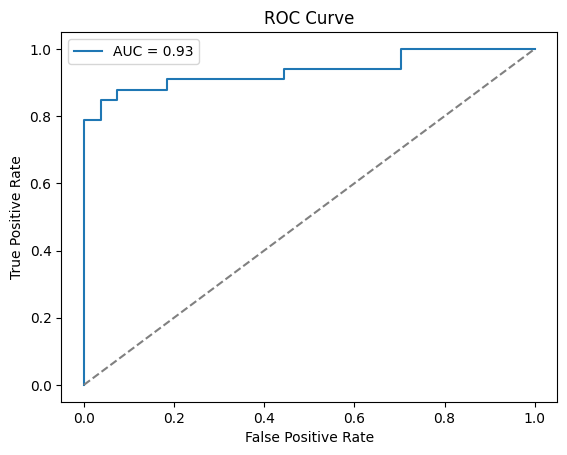

In [ ]:
y_prob = logreg.predict_proba(X_test_final)[:, 1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# AUC score
auc_score = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc_score)

# Plot ROC curve
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")  # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# **Decisoin Tree Classifier Model**

In [ ]:
dtc = DecisionTreeClassifier(random_state=42)

In [ ]:
# param_grid = {
#     "max_depth": [2, 3, 4, 5, 6, 8, 10, None]
# }
#
# # Grid search with cross-validation
# grid = GridSearchCV(dtc, param_grid, cv=5, scoring="accuracy")
# grid.fit(X_final, y)
#
# print("Best max_depth:", grid.best_params_)
# print("Best score:", grid.best_score_)

In [ ]:
dtc.fit(X_train_final, y_train)

y_pred = dtc.predict(X_test_final)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8166666666666667
Confusion Matrix:
 [[24  3]
 [ 8 25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.89      0.81        27
           1       0.89      0.76      0.82        33

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.83      0.82      0.82        60



AUC Score: 0.8232323232323232


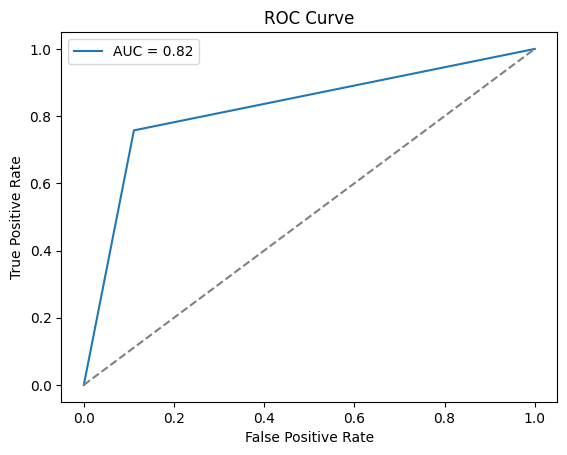

In [ ]:
y_prob = dtc.predict_proba(X_test_final)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

auc_score = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc_score)

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")  # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

#**Random Forest Classifier Model**



In [ ]:
rfc = RandomForestClassifier(random_state=42)

In [ ]:
rfc.fit(X_train_final, y_train)
y_pred = rfc.predict(X_test_final)

print("Random Forest Results\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Random Forest Results

Accuracy: 0.8666666666666667

Confusion Matrix:
 [[24  3]
 [ 5 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.90      0.85      0.88        33

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60



AUC Score: 0.9360269360269361


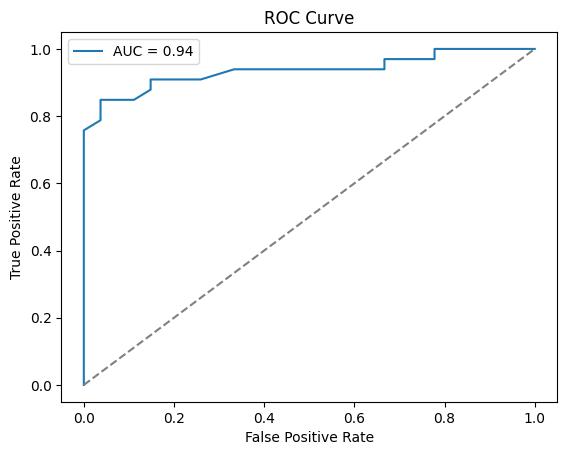

In [ ]:
y_prob = rfc.predict_proba(X_test_final)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

auc_score = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc_score)

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")  # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

#**Support Vector Classifier Model**

In [ ]:
svm = SVC(probability=True,random_state=42)

In [ ]:
svm.fit(X_train_final, y_train)
y_pred = svm.predict(X_test_final)

print("SVM Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

SVM Results
Accuracy: 0.9
Confusion Matrix:
 [[26  1]
 [ 5 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.90        27
           1       0.97      0.85      0.90        33

    accuracy                           0.90        60
   macro avg       0.90      0.91      0.90        60
weighted avg       0.91      0.90      0.90        60



AUC Score: 0.9393939393939393


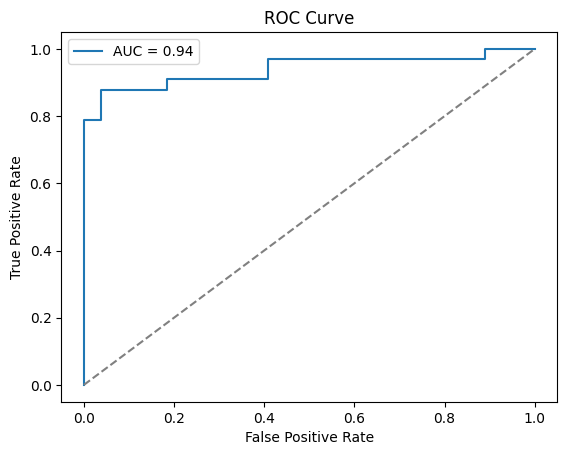

In [ ]:
y_prob = svm.predict_proba(X_test_final)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

auc_score = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc_score)

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")  # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# **Combined ROC Curves & AUCs**

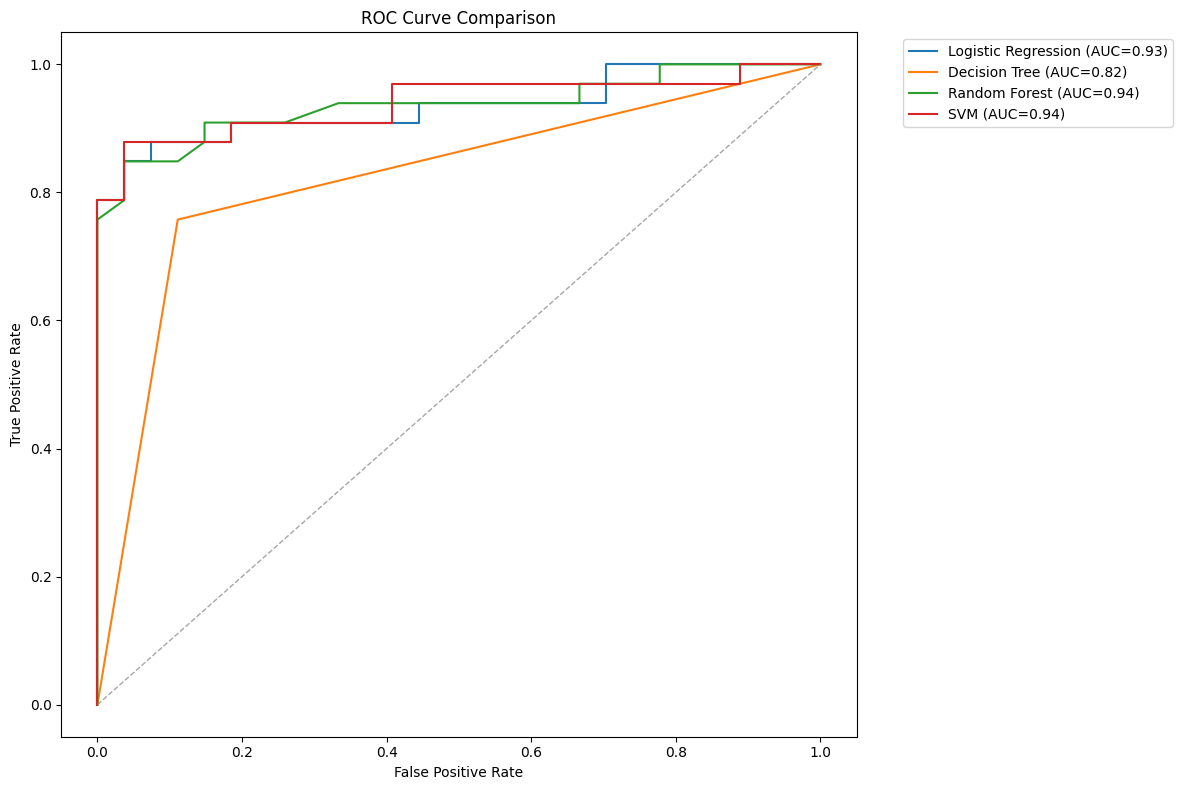

In [ ]:
fitted_models = {
    "Logistic Regression": logreg,
    "Decision Tree": dtc,
    "Random Forest": rfc,
    "SVM": svm,
}

plt.figure(figsize=(12,8))

for name, model in fitted_models.items():
    # choose scaled or raw depending on model
    if name in ["Logistic Regression", "SVM"]:
        y_prob = model.predict_proba(X_test_final)[:, 1]
    else:
        y_prob = model.predict_proba(X_test_final)[:, 1]

    # compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)

    # plot each model’s ROC
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc_score:.2f})")

# baseline (random classifier)
plt.plot([0,1],[0,1], color='gray', linestyle="--", linewidth=1, alpha=0.7)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()